# The Graphs of Odds Logit and Sigmoid

## Odds and Logit

In [5]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

print(p_np)
print(p_tf)

[0.01       0.01989899 0.02979798 0.03969697 0.04959596 0.05949495
 0.06939394 0.07929293 0.08919192 0.09909091 0.1089899  0.11888889
 0.12878788 0.13868687 0.14858586 0.15848485 0.16838384 0.17828283
 0.18818182 0.19808081 0.2079798  0.21787879 0.22777778 0.23767677
 0.24757576 0.25747475 0.26737374 0.27727273 0.28717172 0.29707071
 0.3069697  0.31686869 0.32676768 0.33666667 0.34656566 0.35646465
 0.36636364 0.37626263 0.38616162 0.39606061 0.4059596  0.41585859
 0.42575758 0.43565657 0.44555556 0.45545455 0.46535354 0.47525253
 0.48515152 0.49505051 0.50494949 0.51484848 0.52474747 0.53464646
 0.54454545 0.55444444 0.56434343 0.57424242 0.58414141 0.5940404
 0.60393939 0.61383838 0.62373737 0.63363636 0.64353535 0.65343434
 0.66333333 0.67323232 0.68313131 0.6930303  0.70292929 0.71282828
 0.72272727 0.73262626 0.74252525 0.75242424 0.76232323 0.77222222
 0.78212121 0.7920202  0.80191919 0.81181818 0.82171717 0.83161616
 0.84151515 0.85141414 0.86131313 0.87121212 0.88111111 0.89101

Tensorflow로 생성한 결과는 Numpy를 사용해서 생성한 결과와 같다. 단, tensor의 포맷으로 생성됨.

Text(0.5, 0, 'Probabilities')

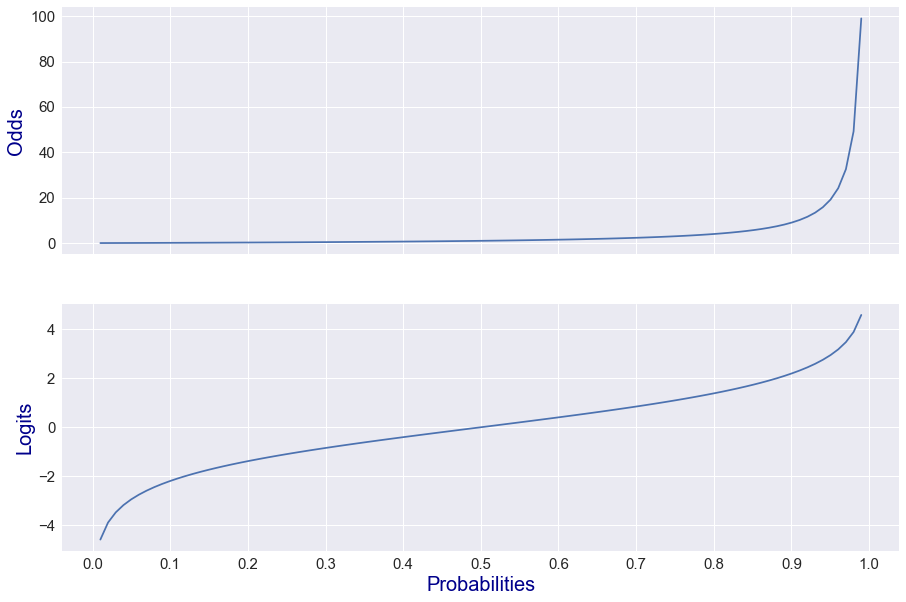

In [16]:
odds_np = p_np/(1-p_np)
odds_tf = p_tf/(1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color = 'darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logits', fontsize=20, color = 'darkblue')
axes[1].set_xlabel('Probabilities', fontsize=20, color = 'darkblue')

Text(0.5, 0, 'Probabilities')

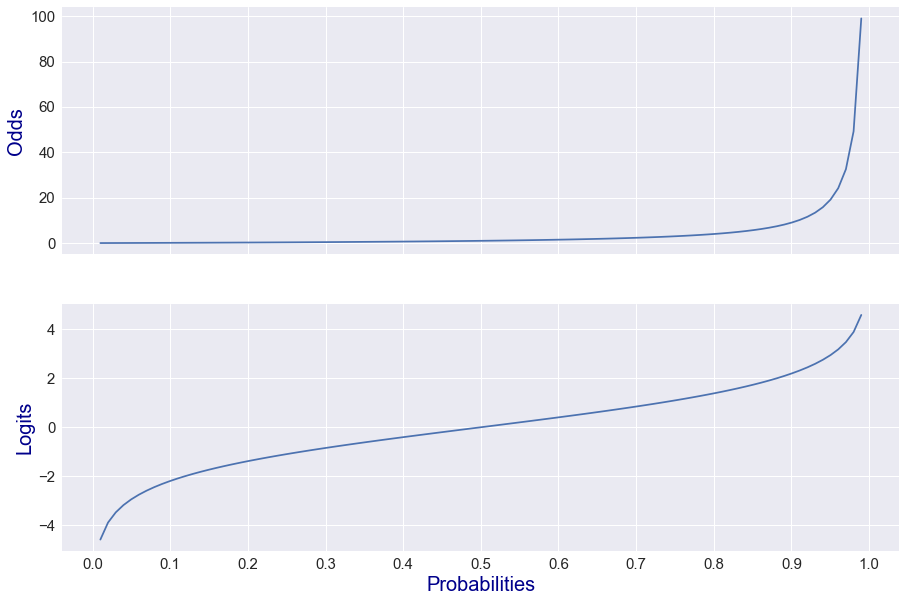

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

axes[0].plot(p_tf, odds_tf)
axes[1].plot(p_tf, logit_tf)

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color = 'darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logits', fontsize=20, color = 'darkblue')
axes[1].set_xlabel('Probabilities', fontsize=20, color = 'darkblue')

## Sigmoid

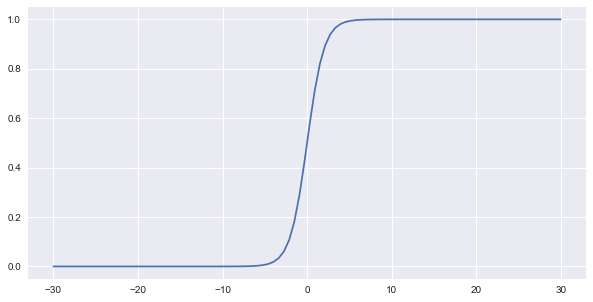

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

## logit 에 대해 생성해봄
X = tf.linspace(-30, 30, 100)

sigmoid = Activation('sigmoid')(X)

fig, axes = plt.subplots(figsize=(10, 5))

axes.plot(X.numpy(), sigmoid.numpy())

x값의 범위는 -무한대 +무한대 인데 y 값은 -1과 1사이이다.
약 -5부터 5 사이의 값을 무시할 수 있게 된다면 sigmoid는 0 또는 1만 출력을 한다.
뉴런의 학습이 잘되면 잘될수록 0에 엄청가깝거나 1에 엄청가깝게 출력하게 된다.

# Logistic Regression Model

## Single-Variate Logistic Regression Models

(100, 1)


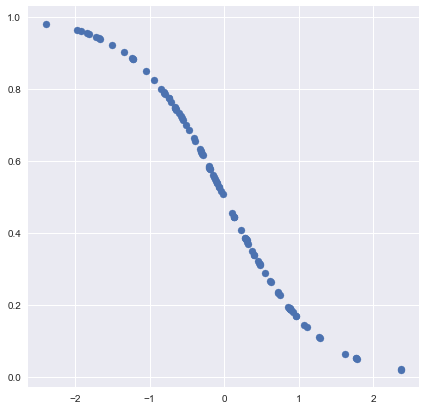

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')
X = tf.random.normal(shape=(100, 1)) # 데이터샘플 100개와 피쳐가 1개인 샘플
dense = Dense(units=1, activation='sigmoid')

Y= dense(X)
print(Y.shape)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(X.numpy().flatten(), Y.numpy().flatten())


Sigmoid 의 그래프는 0과 1사이를 잇는 값이 나옴.

"tf.random.normal", normal distribution을 통해 x의 값이 생성되었기 때문에, 가운데에 값들이 모여있게 된다.
바깥으로 갈수록 적어짐
학습이 끝나고나면 0과 1부분에 많아질 것임.

## Multi-Variate Logistic Regression Models

In [38]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')
X = tf.random.normal(shape=(100, 5)) # 데이터샘플 100개와 피쳐가 5개인 샘플
dense = Dense(units=1, activation='sigmoid') #뉴런 하나만 있으니까 5개의 z값이 1개가 나옴 

Y= dense(X)
print(Y.shape)



(100, 1)


(100,1) 여기서 shape가 1개인 것으로 보아 0 또는 1로 출력할 수 있는 binary적인 결과가 나온다.

# Binary Classifier with Dense Layers

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) 

#첫번째, 두번째 Layer는 관심없고 Binary값으로 출력을 하기 위해서는 
#마지막 Layer에 Sigmoid activation function을 적용해주어야 한다.